In [6]:
#librairies de base
import pandas as pd
import numpy as np
#!pip install ./xgboost-0.4a12.tar.gz
#import xgboost as xgb

#visualisations
import matplotlib.pyplot as plt
import seaborn as sns

#préprocessing ML
from sklearn.preprocessing import StandardScaler

#modèle de ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [134]:
mobilisation = pd.read_csv("LFB Mobilisation data Last 3 years.csv", header=0, sep=";")
incident = pd.read_csv("LFB Incident data Last 3 years.csv", header=0, sep=";")

In [135]:
total = pd.merge(incident, mobilisation, on='IncidentNumber')

In [132]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587073 entries, 0 to 587072
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   IncidentNumber                 587073 non-null  object 
 1   DateOfCall                     587073 non-null  object 
 2   CalYear_x                      587073 non-null  int64  
 3   TimeOfCall                     587073 non-null  object 
 4   HourOfCall_x                   587073 non-null  int64  
 5   IncidentGroup                  587073 non-null  object 
 6   StopCodeDescription            587073 non-null  object 
 7   PropertyCategory               587073 non-null  object 
 8   PropertyType                   587073 non-null  object 
 9   AddressQualifier               587073 non-null  object 
 10  Postcode_district              587073 non-null  object 
 11  UPRN                           587073 non-null  object 
 12  USRN                          

In [137]:
total = total.dropna(axis = 1)

In [138]:
total.isna().sum()

IncidentNumber                   0
DateOfCall                       0
CalYear_x                        0
TimeOfCall                       0
HourOfCall_x                     0
IncidentGroup                    0
StopCodeDescription              0
PropertyCategory                 0
PropertyType                     0
AddressQualifier                 0
Postcode_district                0
UPRN                             0
USRN                             0
IncGeo_BoroughCode               0
IncGeo_BoroughName               0
ProperCase                       0
Easting_rounded                  0
Northing_rounded                 0
FRS                              0
IncidentStationGround            0
NumStationsWithPumpsAttending    0
NumPumpsAttending                0
PumpCount                        0
CalYear_y                        0
HourOfCall_y                     0
ResourceMobilisationId           0
Resource_Code                    0
PerformanceReporting             0
DateAndTimeMobilised

In [139]:
total['minute'] = total['AttendanceTimeSeconds']/60
total['minute'] =  total['minute'].astype('int64', copy=False)


In [108]:
total.head()

,IncidentNumber,DateOfCall,CalYear_x,TimeOfCall,HourOfCall_x,IncidentGroup,StopCodeDescription,PropertyCategory,PropertyType,AddressQualifier,...,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeArrived,AttendanceTimeSeconds,PumpOrder,PlusCode_Code,PlusCode_Description,minute
0,000008-01012018,01 Jan 2018,2018,00:04:25,0,False Alarm,AFA,Non Residential,Mosque,Within same building,...,5055153,A392,1,01/01/2018 00:04:25,01/01/2018 00:10:13,348,1,Initial,Initial Mobilisation,5
1,000193-01012018,01 Jan 2018,2018,04:12:25,4,Special Service,Special Service,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,...,5055355,H331,1,01/01/2018 04:12:25,01/01/2018 04:18:16,351,1,Initial,Initial Mobilisation,5
2,000193-01012018,01 Jan 2018,2018,04:12:25,4,Special Service,Special Service,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,...,5055356,G341,2,01/01/2018 04:12:25,01/01/2018 04:19:15,410,2,Initial,Initial Mobilisation,6
3,000127-01012018,01 Jan 2018,2018,01:39:54,1,Special Service,Special Service,Dwelling,Converted Flat/Maisonettes - 3 or more storeys,Correct incident location,...,5055262,A321,1,01/01/2018 01:39:54,01/01/2018 01:45:30,336,1,Initial,Initial Mobilisation,5
4,000139-01012018,01 Jan 2018,2018,01:52:29,1,Fire,Primary Fire,Dwelling,Converted Flat/Maisonettes - 3 or more storeys,Within same building,...,5055273,G271,1,01/01/2018 01:52:30,01/01/2018 01:56:18,228,1,Initial,Initial Mobilisation,3


In [140]:
numerical_cols = [contname for contname in total.columns if total[contname].dtype in ['float64', 'int64']]
total_numerical = total[numerical_cols]

In [141]:
qualitative_cols = [contname for contname in total.columns if total[contname].dtype in ['object']]
total_qualitative = total[qualitative_cols]

In [19]:
total_qualitative.head()

,IncidentNumber,DateOfCall,TimeOfCall,IncidentGroup,StopCodeDescription,PropertyCategory,PropertyType,AddressQualifier,Postcode_district,UPRN,...,IncGeo_BoroughName,ProperCase,FRS,IncidentStationGround,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeArrived,PlusCode_Code,PlusCode_Description
0,000008-01012018,01 Jan 2018,00:04:25,False Alarm,AFA,Non Residential,Mosque,Within same building,N2,200220110,...,BARNET,Barnet,London,Finchley,A392,1,01/01/2018 00:04:25,01/01/2018 00:10:13,Initial,Initial Mobilisation
1,000193-01012018,01 Jan 2018,04:12:25,Special Service,Special Service,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,SW6,0,...,HAMMERSMITH AND FULHAM,Hammersmith And fulham,London,Fulham,H331,1,01/01/2018 04:12:25,01/01/2018 04:18:16,Initial,Initial Mobilisation
2,000193-01012018,01 Jan 2018,04:12:25,Special Service,Special Service,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,SW6,0,...,HAMMERSMITH AND FULHAM,Hammersmith And fulham,London,Fulham,G341,2,01/01/2018 04:12:25,01/01/2018 04:19:15,Initial,Initial Mobilisation
3,000127-01012018,01 Jan 2018,01:39:54,Special Service,Special Service,Dwelling,Converted Flat/Maisonettes - 3 or more storeys,Correct incident location,N8,0,...,HARINGEY,Haringey,London,Hornsey,A321,1,01/01/2018 01:39:54,01/01/2018 01:45:30,Initial,Initial Mobilisation
4,000139-01012018,01 Jan 2018,01:52:29,Fire,Primary Fire,Dwelling,Converted Flat/Maisonettes - 3 or more storeys,Within same building,W11,0,...,KENSINGTON AND CHELSEA,Kensington And chelsea,London,North Kensington,G271,1,01/01/2018 01:52:30,01/01/2018 01:56:18,Initial,Initial Mobilisation


In [ ]:
total_numerical.sample()

,CalYear_x,HourOfCall_x,USRN,Easting_rounded,Northing_rounded,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,CalYear_y,HourOfCall_y,ResourceMobilisationId,AttendanceTimeSeconds,PumpOrder
235498,2019,23,22207589,543250,183750,1.0,1.0,1.0,2019,23,5431411,343,1


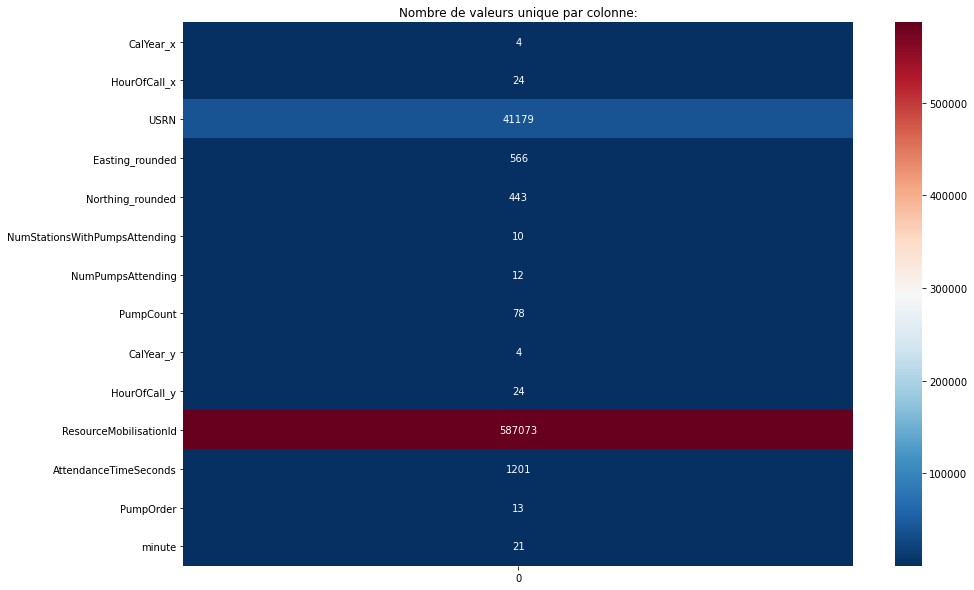

In [142]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=total_numerical.nunique().to_frame(), cmap='RdBu_r',fmt='d',annot=True).set_title('Nombre de valeurs unique par colonne:');

In [121]:
total_numerical = total_numerical.drop(["USRN", "ResourceMobilisationId","Easting_rounded","Northing_rounded"], axis = 1)

In [122]:
total_numerical.isna().sum()

CalYear_x                        0
HourOfCall_x                     0
NumStationsWithPumpsAttending    0
NumPumpsAttending                0
PumpCount                        0
CalYear_y                        0
HourOfCall_y                     0
AttendanceTimeSeconds            0
PumpOrder                        0
minute                           0
dtype: int64

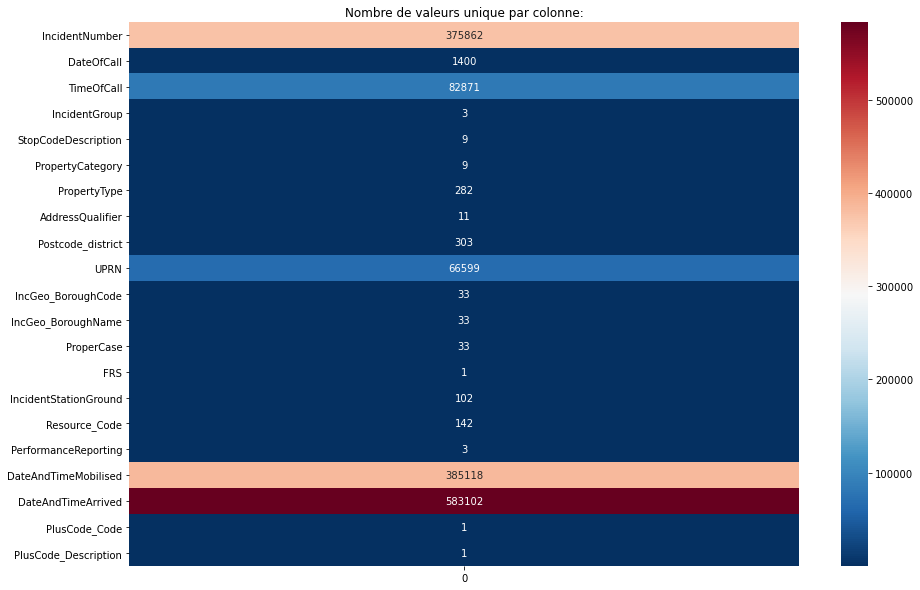

In [143]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=total_qualitative.nunique().to_frame(), cmap='RdBu_r',fmt='d',annot=True).set_title('Nombre de valeurs unique par colonne:');

In [144]:
total_quali = total_qualitative.drop(["IncidentNumber", "DateOfCall", "TimeOfCall", "UPRN", "IncGeo_BoroughCode", "FRS", "DateAndTimeMobilised", "DateAndTimeArrived", "PlusCode_Code", "PlusCode_Description"], axis = 1)

In [80]:
total_quali.sample()

,IncidentGroup,StopCodeDescription,PropertyCategory,PropertyType,AddressQualifier,IncGeo_BoroughName,ProperCase,Resource_Code,PerformanceReporting
387631,False Alarm,AFA,Non Residential,Warehouse,Correct incident location,SOUTHWARK,Southwark,E371,1


In [ ]:
#total_quali = total_quali.drop(["IncGeo_BoroughName"], axis = 1)

In [ ]:
#total_quali = total_quali.drop(["ProperCase"], axis = 1)

In [145]:
total_quali.nunique()

IncidentGroup              3
StopCodeDescription        9
PropertyCategory           9
PropertyType             282
AddressQualifier          11
Postcode_district        303
IncGeo_BoroughName        33
ProperCase                33
IncidentStationGround    102
Resource_Code            142
PerformanceReporting       3
dtype: int64

In [146]:
test = pd.get_dummies(total_quali)

In [147]:
test.shape

(587073, 930)

In [148]:
df = pd.concat([total_numerical, test], axis = 1)

In [149]:
X = df.drop(["AttendanceTimeSeconds", "minute"], axis = 1)
y = df.minute

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=101)

In [60]:
X_train.shape
y_train.shape
y_test.shape

(117415,)

In [87]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train.iloc[:,:11])
X_test_scaled = sc.transform(X_test.iloc[:,:11])

In [151]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [152]:
print('score train :', model.score(X_train, y_train))
print('score test :', model.score(X_test, y_test))

score train : 0.29399609802017945
score test : 0.2863378589517179


In [ ]:
#score train : 0.22770281272340676
#score test : 0.2247535100066793

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b17c1edb-d108-435e-8763-692c57d2ed0e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>